# Audio Features - Comparing Groups

Exploratory data analysis and statistical compaisons between the treatment (mindfulness practice) and control groups.

Goal: identify features that show largest differences between the two groups to select some prominent features for a classification model.

In [1]:
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_path = './data/'

In [4]:
# Read in audio and transcript features
df_audio = pd.read_csv(data_path + 'Teacher_Mindfulness_Audio_Transcript_Features_20230214.csv')
df_audio.head()

,ID,Total_Duration,Teacher_Duration,Student_Duration,Percent_Time_Teacher,Average_Speaker_Duration,Average_Teacher_Duration,Average_Student_Duration,Total_Word_Count,Teacher_Word_Count,Student_Word_Count,Teacher_Percent_Words,Total_Word_Rate,Teacher_Word_Rate,Student_Word_Rate,Total_Speaker_Line_Count,Teacher_Line_Count,Student_Line_Count,number_ of_syllables,number_of_pauses,rate_of_speech,articulation_rate,speaking_duration,original_duration,balance,f0_mean,f0_std,f0_median,f0_min,f0_max,f0_quantile25,f0_quan75,Mood,MFCC_1_Mean,MFCC_2_Mean,MFCC_3_Mean,MFCC_4_Mean,MFCC_5_Mean,MFCC_6_Mean,MFCC_7_Mean,MFCC_8_Mean,MFCC_9_Mean,MFCC_10_Mean,MFCC_11_Mean,MFCC_12_Mean,MFCC_13_Mean,MFCC_1_Var,MFCC_2_Var,MFCC_3_Var,MFCC_4_Var,MFCC_5_Var,MFCC_6_Var,MFCC_7_Var,MFCC_8_Var,MFCC_9_Var,MFCC_10_Var,MFCC_11_Var,MFCC_12_Var,MFCC_13_Var,MFCC_1_Skew,MFCC_2_Skew,MFCC_3_Skew,MFCC_4_Skew,MFCC_5_Skew,MFCC_6_Skew,MFCC_7_Skew,MFCC_8_Skew,MFCC_9_Skew,MFCC_10_Skew,MFCC_11_Skew,MFCC_12_Skew,MFCC_13_Skew,MFCC_1_Kurtosis,MFCC_2_Kurtosis,MFCC_3_Kurtosis,MFCC_4_Kurtosis,MFCC_5_Kurtosis,MFCC_6_Kurtosis,MFCC_7_Kurtosis,MFCC_8_Kurtosis,MFCC_9_Kurtosis,MFCC_10_Kurtosis,MFCC_11_Kurtosis,MFCC_12_Kurtosis,MFCC_13_Kurtosis,RMS_Mean,RMS_Max,RMS_Min,RMS_Std,Centroid_Mean,Centroid_Max,Centroid_Min,Centroid_Std,Bandwidth_Mean,Bandwidth_Max,Bandwidth_Min,Bandwidth_Std,Flatness_Mean,Flatness_Max,Flatness_Min,Flatness_Std,Zero_Crossing_Rate_Mean,Zero_Crossing_Rate_Max,Zero_Crossing_Rate_Min,Zero_Crossing_Rate_Std,Loudness_Mean,Loudness_Max,Loudness_Min,Loudness_Std
0,332,308.563991,141,167.563991,0.456955,9.075411,8.294118,9.856705,697,305,392,0.437590,2.258851,2.163121,2.339405,34,17,17,411,62,3.0,4,93.5,144.6,0.6,211.67,53.96,204.2,73,409,181,242,Reading,12.275767,11.248416,-11.403405,8.994111,-6.947085,3.552934,-2.149697,-13.171859,-11.721801,-13.183566,0.719455,-1.359205,2.892683,59.003330,428.052921,376.570811,480.629189,271.816805,240.442430,250.107968,218.737862,230.139384,183.706385,173.748565,163.662589,96.546882,-4.427178,-0.384546,-0.256914,0.305199,-0.266844,-0.182173,-0.167009,-0.289583,-0.229382,-0.212150,0.169246,0.047610,0.078353,24.993674,-1.021163,-0.388692,-0.197681,-0.027963,0.335898,0.345799,0.218810,0.077423,0.002506,0.748178,0.050016,0.413932,0.029641,0.234953,0.0,0.030134,1786.920458,9837.121455,0.0,1342.793978,1637.887678,4029.576143,0.0,736.167078,0.019112,1.000001,1.480000e-06,0.101342,0.106655,0.724121,0.0,0.111820,-41.060013,-12.580391,-92.580391,19.036415
1,348,309.289320,86,223.289320,0.278057,6.580624,3.739130,9.303722,698,195,503,0.279370,2.256787,2.267442,2.252683,47,23,24,255,39,3.0,5,50.5,86.0,0.6,244.32,56.67,242.1,80,421,208,278,speaking passionately,10.869401,9.074677,-11.908164,7.795241,-7.867180,-0.395680,-6.808521,-14.854105,-5.608134,0.335741,2.010402,-11.104792,-2.374372,117.844373,443.504212,340.872066,421.846288,392.088738,269.676208,282.780823,278.891346,201.598711,184.257387,180.524235,156.742620,103.860091,-3.403572,-0.447509,-0.170911,0.054505,-0.355915,0.015943,-0.269408,-0.323910,-0.181812,0.243745,0.255444,-0.148239,-0.153220,12.028351,-0.977772,-0.562810,-0.102892,-0.054601,0.898272,0.406222,-0.280488,0.297556,0.332433,0.374174,-0.063299,0.823779,0.027384,0.194261,0.0,0.029680,1880.643307,9922.177642,0.0,1412.091525,1741.747397,4338.004791,0.0,810.380525,0.038517,1.000001,2.170000e-06,0.168635,0.102524,0.819824,0.0,0.115759,-43.753429,-14.232292,-94.232292,21.297735
2,335,313.918662,145,168.918662,0.461903,6.975970,6.590909,7.344290,1021,567,454,0.555338,3.252435,3.910345,2.687684,45,22,23,427,87,3.0,5,87.3,141.0,0.6,239.45,66.01,232.6,72,424,189,287,speaking passionately,11.718530,5.376386,-16.785159,14.851442,-1.599988,0.735789,-0.782310,-13.534004,-5.126506,-5.123688,-7.457674,-6.685852,-0.191224,103.212547,407.618625,404.010201,325.159615,254.870539,195.726934,270.849372,262.024990,174.123677,163.250007,181.294042,127.413792,87.696152,-3.331619,-0.295017,-0.139161,0.311863,-0.106684,-0.227299,-0.159920,-0.256241,-0.

In [5]:
# Read in survey data
df_survey = pd.read_csv(data_path + 'survey data.csv',
                        usecols = ['studyid', 'mindfulness'])
df_survey.head()


,studyid,mindfulness
0,201,1
1,202,0
2,203,1
3,204,0
4,205,1


In [6]:
# Join datasets
df = df_audio.merge(df_survey, 
                    left_on = 'ID', 
                    right_on = 'studyid')

## Two Sample T-Test

Compute t-test comparing the differences in means between the treatment and control groups. Loop through each variable and save the t-stat and p-value in a data frame. 

Use [Scipy t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the T-test for the means of two independent samples. This is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

In [7]:
# Get list of all potential features in this data
feature_list = [feat for feat in df.columns if feat not in ['ID', 'studyid', 'mindfulness', 'Mood']]

In [8]:
# Create empty df to hold t-test results
ttest_results = pd.DataFrame()

In [9]:
for feat in feature_list:
    # Separate treatment and control into separate dataframes
    # and select just this feature
    df_0 = df[df['mindfulness']==0]
    df_1 = df[df['mindfulness']==1]
    
    # Compute t test results for this feature
    temp_result = stats.ttest_ind(a = df_0[feat], 
                                  b = df_1[feat],
                                  equal_var = False)
    
    # Add t stat and p value to results df
    df_temp = pd.DataFrame({
                            'feature': feat,
                            'mean_0': df_0[feat].mean(),
                            'mean_1': df_1[feat].mean(),
                            't_statistic': temp_result[0],
                            'p_value': temp_result[1]
                            }, 
                            index = [0])
    
    ttest_results = pd.concat([ttest_results, df_temp], axis=0)


In [10]:
ttest_results.reset_index(inplace = True, drop = True)

In [11]:
# Sort by p-value to see which variables show the largest differences
ttest_results.sort_values('p_value', inplace = True)
ttest_results.head(10)

,feature,mean_0,mean_1,t_statistic,p_value
5,Average_Teacher_Duration,8.770774,7.721627,2.285240,0.024762
9,Student_Word_Count,264.717391,292.534884,-1.840621,0.069809
67,MFCC_11_Skew,0.051254,-0.028348,1.818815,0.072385
102,Zero_Crossing_Rate_Std,0.105381,0.097978,1.703519,0.092466
72,MFCC_3_Kurtosis,-0.375162,-0.504436,1.702287,0.092631
15,Teacher_Line_Count,22.130435,23.651163,-1.683496,0.095866
77,MFCC_8_Kurtosis,0.067956,-0.076068,1.600801,0.114777
13,Student_Word_Rate,2.085660,2.200172,-1.583698,0.116980
101,Zero_Crossing_Rate_Min,0.000053,0.000488,-1.547210,0.128802
76,MFCC_7_Kurtosis,0.343888,0.032315,1.508744,0.136756


## EDA for Top Features

Creating some visuals to look at the features with smaller p-values.

In [12]:
top_10_feats = ttest_results.head(10).feature.to_list()

Average_Teacher_Duration
Feature: Average_Teacher_Duration
P-value: 0.0248


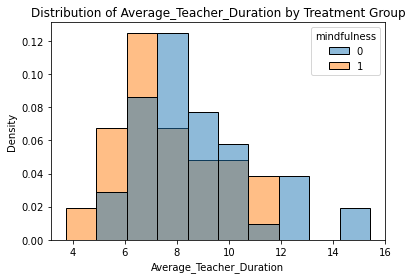

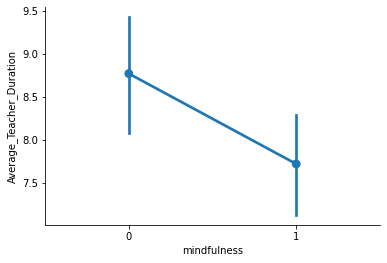


Student_Word_Count
Feature: Student_Word_Count
P-value: 0.0698


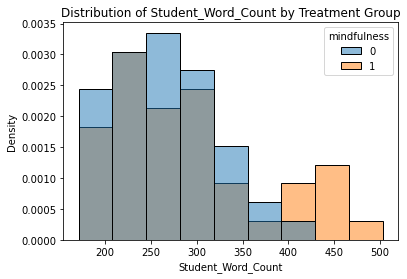

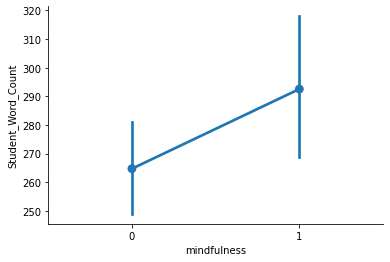


MFCC_11_Skew
Feature: MFCC_11_Skew
P-value: 0.0724


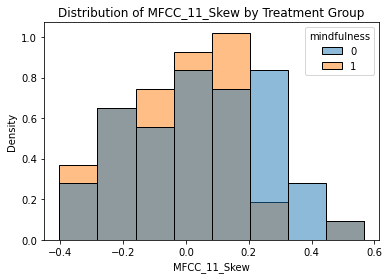

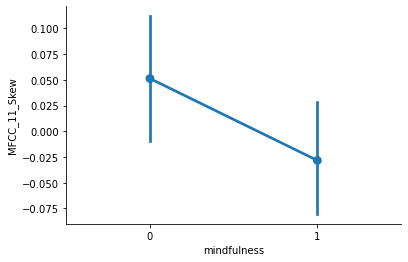


Zero_Crossing_Rate_Std
Feature: Zero_Crossing_Rate_Std
P-value: 0.0925


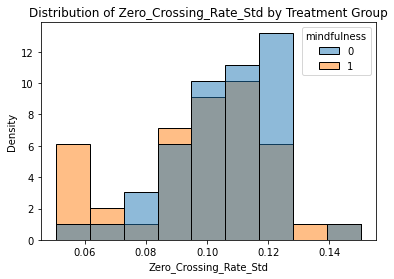

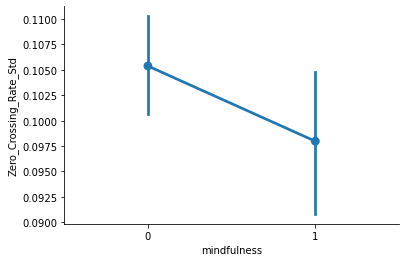


MFCC_3_Kurtosis
Feature: MFCC_3_Kurtosis
P-value: 0.0926


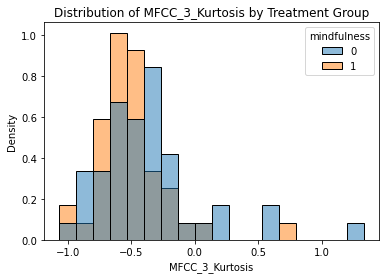

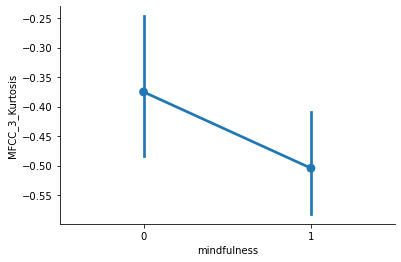


Teacher_Line_Count
Feature: Teacher_Line_Count
P-value: 0.0959


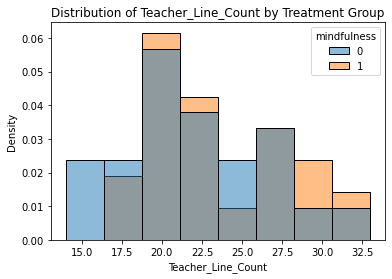

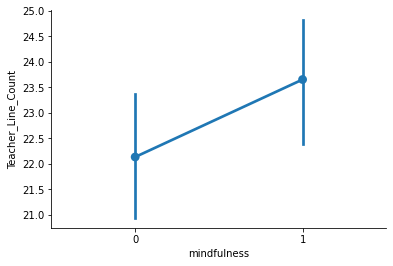


MFCC_8_Kurtosis
Feature: MFCC_8_Kurtosis
P-value: 0.1148


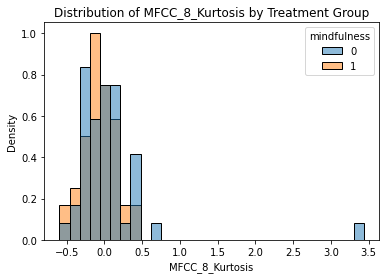

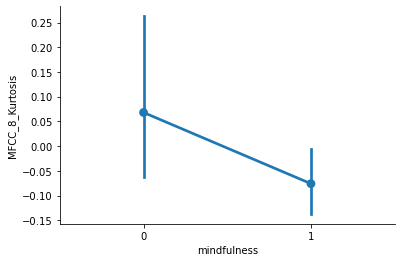


Student_Word_Rate
Feature: Student_Word_Rate
P-value: 0.117


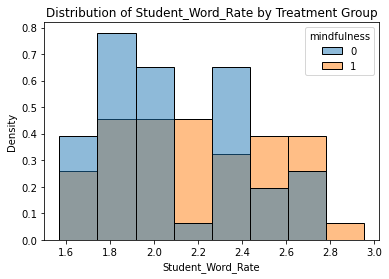

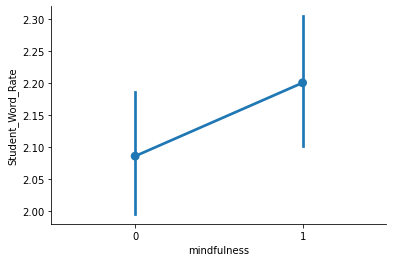


Zero_Crossing_Rate_Min
Feature: Zero_Crossing_Rate_Min
P-value: 0.1288


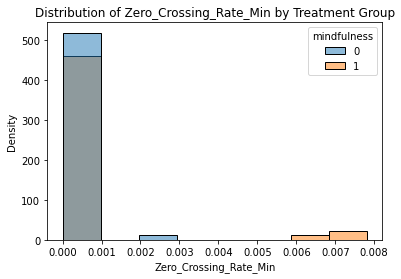

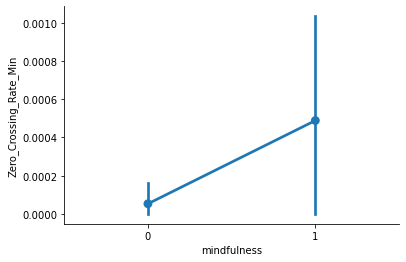


MFCC_7_Kurtosis
Feature: MFCC_7_Kurtosis
P-value: 0.1368


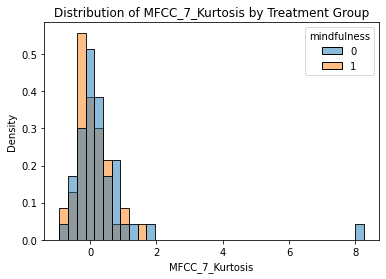

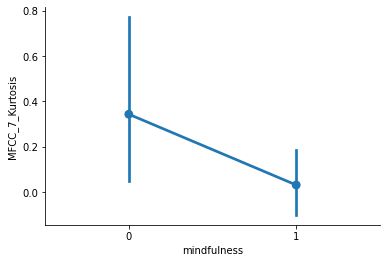

In [13]:
for feat in top_10_feats:
    print(feat)
    print(f'Feature: {feat}')
    p_val = ttest_results[ttest_results['feature']==feat]['p_value'].iloc[0]
    print(f'P-value: {round(p_val,4)}')
    
    # Histogram comparing distrubtion of feature by group
    sns.histplot(data = df, 
                 x = feat, 
                 hue = 'mindfulness',
                 stat = 'density')
    plt.title(f'Distribution of {feat} by Treatment Group')
    plt.show()
    
    # Plot comparing means and uncertainty
    sns.pointplot(x = 'mindfulness', y = feat, data = df)
    sns.despine()
    plt.show()
    print()